In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import statsmodels.api as sm

In [4]:
# Classic data reading
df = pd.read_csv("heart.csv")

In [5]:
# First 5 index of our data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Data contains;

- age - age in years 
- sex - (1 = male; 0 = female)
- cp - chest pain type 
- trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
- chol - serum cholestoral in mg/dl 
- fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
- restecg - resting electrocardiographic results 
- thalach - maximum heart rate achieved 
- exang - exercise induced angina (1 = yes; 0 = no) 
- oldpeak - ST depression induced by exercise relative to rest 
- slope - the slope of the peak exercise ST segment 
- ca - number of major vessels (0-3) colored by flourosopy 
- thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 
- target - have disease or not (1=yes, 0=no) 

### This notebook is only about learning the logistic regression, full project will be displayed soon

# EX 1

In [12]:
x = df["sex"].values.reshape(-1,1)
y = df["target"].values

In [13]:
print(x)
print(y)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [1]]
[0 0 0 ... 0 1 0]


In [15]:
model = LogisticRegression(solver = 'liblinear', random_state = 0).fit(x,y)

In [19]:
print('Model classes:', model.classes_)
print('Model intercept', model.intercept_)
print('Model coefficient:', model.coef_)

Model classes: [0 1]
Model intercept [0.93153183]
Model coefficient: [[-1.24404196]]


In [20]:
model.predict_proba(x)

array([[0.57749784, 0.42250216],
       [0.57749784, 0.42250216],
       [0.57749784, 0.42250216],
       ...,
       [0.57749784, 0.42250216],
       [0.28261404, 0.71738596],
       [0.57749784, 0.42250216]])

In [24]:
x_pred = model.predict(x)

In [22]:
model.score(x,y)

0.6234146341463415

In [26]:
cm = confusion_matrix(y, x_pred)
cm

array([[413,  86],
       [300, 226]], dtype=int64)

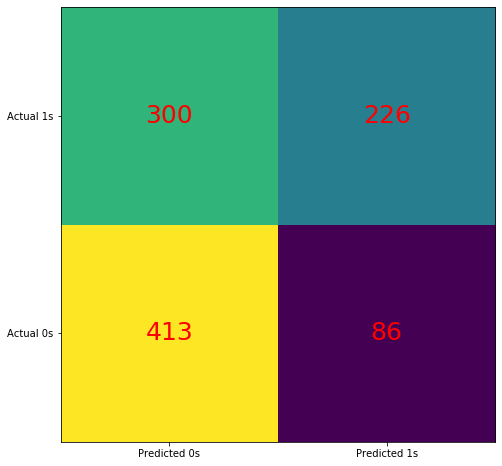

In [65]:
# Confusion matrix visualisation
fig, ax = plt.subplots(figsize = (8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks = (0,1), ticklabels = ('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks = (0,1), ticklabels = ('Actual 0s', 'Actual 1s'))
ax.set_ylim(bottom = -0.5, top = 1.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red', size = 25)


In [69]:
print(classification_report(y, x_pred))

              precision    recall  f1-score   support

           0       0.58      0.83      0.68       499
           1       0.72      0.43      0.54       526

    accuracy                           0.62      1025
   macro avg       0.65      0.63      0.61      1025
weighted avg       0.65      0.62      0.61      1025



# EX 2

In [71]:
x = df["sex"].values.reshape(-1,1)
y = df["target"].values
x = sm.add_constant(x)

In [72]:
x

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       ...,
       [1., 1.],
       [1., 0.],
       [1., 1.]])

In [81]:
model = sm.Logit(y,x)

In [82]:
result = model.fit(method = 'newton')

Optimization terminated successfully.
         Current function value: 0.652609
         Iterations 5


In [83]:
result.params

array([ 0.9661877 , -1.28585282])

In [84]:
result.predict(x)

array([0.42075736, 0.42075736, 0.42075736, ..., 0.42075736, 0.72435897,
       0.42075736])

In [87]:
# Predicted outputs
(result.predict(x) >= 0.5).astype(int)

array([0, 0, 0, ..., 0, 1, 0])

In [88]:
result.pred_table()

array([[413.,  86.],
       [300., 226.]])

In [90]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1025
Model:                          Logit   Df Residuals:                     1023
Method:                           MLE   Df Model:                            1
Date:                Wed, 27 May 2020   Pseudo R-squ.:                 0.05801
Time:                        12:40:51   Log-Likelihood:                -668.92
converged:                       True   LL-Null:                       -710.12
Covariance Type:            nonrobust   LLR p-value:                 1.116e-19
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9662      0.127      7.626      0.000       0.718       1.215
x1            -1.2859      0.148     -8.707      0.000      -1.575      -0.996
